In [1]:
# Libs for data manipulation
import numpy as np
import pandas as pd

# Lib for graphs visualisation
import matplotlib.pyplot as plt

# Libs for stats
from scipy.stats import circmean, circvar
from astropy.stats import rayleightest

In [2]:
folder = "Data_thomas/230407-galv-s54-analyse/"
file_name = "230407-galv-s54_000-Phase Ev-GVS & MS-L-Caud- mode 'S-S'.txt"

In [3]:
df = pd.read_csv(folder+file_name, sep=" ")

print(df)

         Time  'S-S'_Phase
0     1.41168     0.100801
1     1.41168     0.730025
2     3.41151     0.770625
3     5.41145     0.818882
4     7.41235     0.923910
5    11.41210     0.069420
6    13.41200     0.061655
7    13.41200     0.965126
8    17.41170     0.054158
9    19.41160     0.002453
10  116.41100     0.089458
11  116.41100     0.750962
12  118.41100     0.783496
13  122.41100     0.009690
14  122.41100     0.896999
15  126.41100     0.098923
16  128.41200     0.066486
17  130.41200     0.050641
18  132.41100     0.099329
19  134.41100     0.002835
20  198.94600     0.081103
21  198.94600     0.831309
22  200.94600     0.847728
23  204.94600     0.065811
24  206.94700     0.073672
25  206.94700     0.840001
26  208.94700     0.888707
27  212.94700     0.090639
28  212.94700     0.945733
29  214.94600     0.744371
30  312.75400     0.077182
31  312.75400     0.730595
32  314.75400     0.835760
33  318.75300     0.029637
34  320.75300     0.054158
35  322.75300     0.086665
3

In [4]:
phase_numbers = []
phase_tmp = 1
row_to_delete = []
for i in range(df.shape[0]):
    if i != 0:
        if df.iloc[i, 0] - df.iloc[i-1, 0] > 10:
            row_to_delete.append(i)
            phase_tmp += 1
    phase_numbers.append(phase_tmp)
df['Phase_Number'] = phase_numbers
df = df.drop(row_to_delete)

In [5]:
df["'S-S'_Phase"] = df["'S-S'_Phase"] *360
print(df)

         Time  'S-S'_Phase  Phase_Number
0     1.41168    36.288360             1
1     1.41168   262.809000             1
2     3.41151   277.425000             1
3     5.41145   294.797520             1
4     7.41235   332.607600             1
5    11.41210    24.991092             1
6    13.41200    22.195656             1
7    13.41200   347.445360             1
8    17.41170    19.496772             1
9    19.41160     0.883040             1
11  116.41100   270.346320             2
12  118.41100   282.058560             2
13  122.41100     3.488461             2
14  122.41100   322.919640             2
15  126.41100    35.612388             2
16  128.41200    23.934924             2
17  130.41200    18.230652             2
18  132.41100    35.758440             2
19  134.41100     1.020722             2
21  198.94600   299.271240             3
22  200.94600   305.182080             3
23  204.94600    23.691888             3
24  206.94700    26.522028             3
25  206.94700   

6.073648941288917 2.3279201563100367


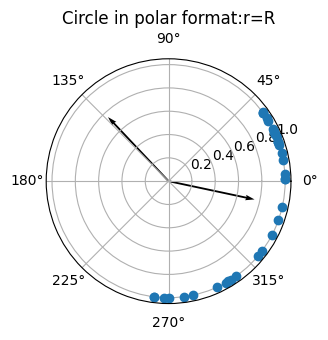

In [63]:
angles = np.deg2rad(df["'S-S'_Phase"])
order = angles.sort_values().array
n = angles.shape[0]
mean = circmean(angles)
var = circvar(angles)
r = 1 - var
Z = n*r*r
p = rayleightest(angles)

ax = plt.axes(projection='polar')
#ax.set_theta_zero_location("N")  # theta=0 at the top
#ax.set_theta_direction(-1)  # theta increasing clockwise

# Set the title of the polar plot
ax.set_title('Circle in polar format:r=R')
#ax.set_theta_offset(np.pi)

mean2 = np.deg2rad(133.38)
r2 = 0.7202
print(mean,mean2)
X = [mean,mean2]
Y = [0,0]
U = [0,0]
V = [r,r2]

ax.quiver(X,Y,U,V, color='black', angles="xy", scale=2)
#ax.quiver(0,0,-0.5,-0.5, color='black', angles="uv", scale_units='xy', scale=1)

ax.plot(angles,[1]*angles.shape[0],'o')

# Display the Polar plot
plt.show()

In [7]:
u = 0
for i in range(n):
    t=0
    if i==n-1:
        t= 2*np.pi - order[i]+ order[0]
    else:
        t= order[i+1] - order[i]
    u += abs(t- 2*np.pi/n)
u= 0.5*u

In [8]:
print("Number of observations : {}".format(n))
print("Mean vector : {}".format(np.rad2deg(mean)))
print("Length of mean vector : {}".format(r))
print("Rayleigh test (Z) : {}".format(Z))
print("Rayleigh test (p) : {}".format(p))
print("Rao's spacing test (U) : {}".format(np.rad2deg(u)))

Number of observations : 36
Mean vector : 347.9944505799557
Length of mean vector : 0.7179524173003727
Rayleigh test (Z) : 18.556404246268148
Rayleigh test (p) : 4.7586586695573945e-09
Rao's spacing test (U) : 227.4497204


In [9]:
import math
import numpy as np

v = np.array([2,1])
vTan = v[1] / v[0]
print ('tan = ' + str(vTan))
vAtan = math.atan(vTan)
# atan returns the angle in radians, so convert to degrees
print('inverse-tan = ' + str(math.degrees(vAtan)))

tan = 0.5
inverse-tan = 26.56505117707799


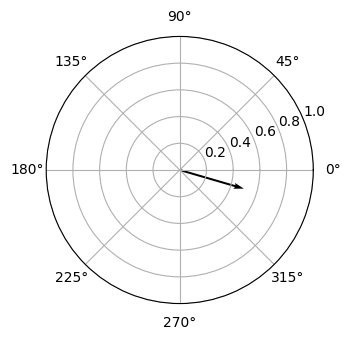

In [60]:
X = (0, 0)
Y = (0, 0)
U = (1, -1)
V = (1, -1)

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.set_ylim(0,1)
#ax.arrow(3.14, 0, 0, 0.5)
ax.quiver(6,0,0,1, angles="xy", scale=4)

plt.show()

[[0.         1.57079633 3.14159265 4.71238898 6.28318531]
 [0.         1.57079633 3.14159265 4.71238898 6.28318531]
 [0.         1.57079633 3.14159265 4.71238898 6.28318531]] [[0.  0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5 0.5]
 [1.  1.  1.  1.  1. ]] [[ 1. -1. -1.  1.  1.]
 [ 1. -1. -1.  1.  1.]
 [ 1. -1. -1.  1.  1.]] [[ 1.  1. -1. -1.  1.]
 [ 1.  1. -1. -1.  1.]
 [ 1.  1. -1. -1.  1.]]


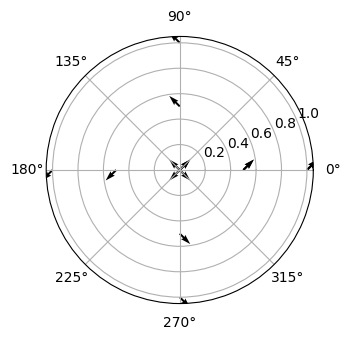

In [11]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

radii = np.linspace(0, 1, 3)
thetas = np.linspace(0, 2 * np.pi, 5)
theta, r = np.meshgrid(thetas, radii)

f = plt.figure()

print(theta, r, np.cos(theta) - np.sin(theta), np.sin(theta) + np.cos(theta))

ax = f.add_subplot(polar=True)
ax.quiver(theta, r, np.cos(theta) - np.sin(theta), np.sin(theta) + np.cos(theta))

plt.show()